In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
dataset=pd.read_csv('winequality-red.csv', delimiter=';')

In [3]:
dataset.head()
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
columns_indices_to_drop = [3, 8, 11]
dataset= dataset.drop(dataset.columns[columns_indices_to_drop], axis=1)

In [5]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
from sklearn.model_selection import train_test_split as tts 
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=54)

In [6]:
from sklearn.linear_model import LinearRegression as lr
regressor=lr()

In [7]:
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'n_jobs': [1, 2, 3, 4]
}

In [8]:
scoring = ['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error', 'neg_median_absolute_error']
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring=scoring, refit='neg_mean_squared_error',verbose=1)
grid_search.fit(x_test, y_test)
regressor.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


LinearRegression()

In [9]:
# Getting the best model from GridSearchCV
best_model = grid_search.best_estimator_
print("Best Model: {grid_search.best_params_}")

Best Model: {grid_search.best_params_}


In [10]:
# Predicting the values using the best model
y_pred = best_model.predict(x_test)

In [11]:
# Best hyperparameters 
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'fit_intercept': True, 'n_jobs': 1, 'positive': False}


In [12]:
# Predicting the values using the best model
y_pred=regressor.predict(x_test)
print(y_pred)

[11.3287552  10.06362673 10.6791345  10.14015991 10.46095755 10.31471906
  9.80209396 10.32807182 10.57350134 10.81364133 10.3164672  10.23479884
 11.16124692 11.6963654   9.24269086 10.08101654 11.73844368 10.62672017
 10.83927045 11.55353195 12.16782937  9.52741622 11.29479026 11.52779191
 10.43649878 10.54984578 10.09150266 11.88318048 10.93810779 10.64305016
 11.45669765 10.73247265  9.9864676  10.37043609 12.1452119  11.64470326
 10.2578178  11.46845888  9.46327968  9.79195474 10.14348162 10.94700441
 10.04581814  9.63068901 10.06135803 10.08462325 11.12471592 10.87930776
  8.72393637  9.80306968 10.33092311 10.57701954 10.35958455 11.39905507
 11.49651192 10.87225753 10.0605007  10.859195   10.13832579 10.51225273
 10.33317281 10.87466082  8.88797258  9.16776648  9.90950141 10.30236578
 10.71230243 10.18897916 11.94866439 10.5853855  10.01788976 10.91593147
  9.25764886 10.59830185 11.33263767 11.08137884  8.48476481 10.61276029
  9.88543791  9.91173298 10.30006985 10.913619   11

In [13]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[11.3287552   9.8       ]
 [10.06362673  9.6       ]
 [10.6791345  10.        ]
 [10.14015991  9.5       ]
 [10.46095755 10.2       ]
 [10.31471906 11.        ]
 [ 9.80209396  9.7       ]
 [10.32807182  9.5       ]
 [10.57350134 10.6       ]
 [10.81364133 10.3       ]
 [10.3164672   9.9       ]
 [10.23479884  9.6       ]
 [11.16124692 11.1       ]
 [11.6963654  11.1       ]
 [ 9.24269086 12.7       ]
 [10.08101654  9.3       ]
 [11.73844368 11.2       ]
 [10.62672017  9.7       ]
 [10.83927045 11.2       ]
 [11.55353195 11.6       ]
 [12.16782937 12.1       ]
 [ 9.52741622 10.1       ]
 [11.29479026 11.1       ]
 [11.52779191 11.1       ]
 [10.43649878  9.6       ]
 [10.54984578 11.2       ]
 [10.09150266  9.4       ]
 [11.88318048 13.56666667]
 [10.93810779 11.6       ]
 [10.64305016  9.8       ]
 [11.45669765 12.8       ]
 [10.73247265 11.7       ]
 [ 9.9864676  10.8       ]
 [10.37043609  9.2       ]
 [12.1452119  14.        ]
 [11.64470326 12.3       ]
 [10.2578178  10.4       ]
 

In [14]:
print(regressor.intercept_)
regressor.coef_

410.39587759851236


array([ 1.55688725e-01,  5.97533232e-01,  1.50126854e+00, -5.09578965e+00,
        9.30614496e-03, -6.51866324e-03, -4.03525147e+02,  1.26857266e+00])

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.5866127856078729
R2 Score: 0.51517768807905


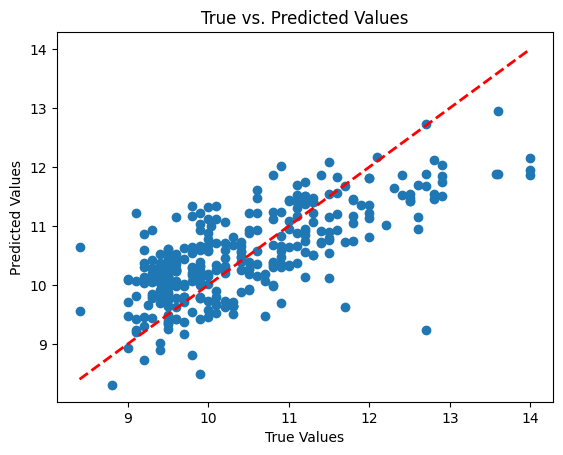

In [16]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()

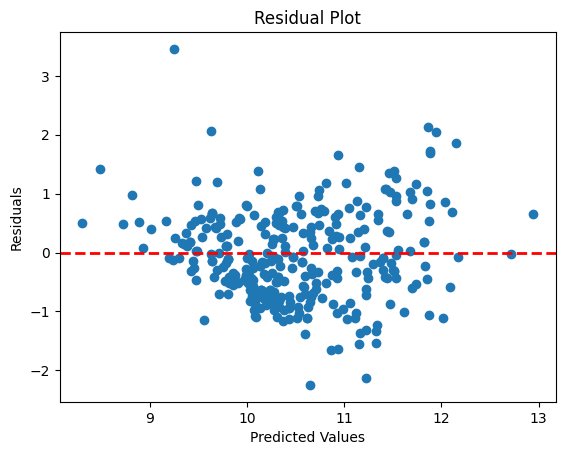

In [17]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

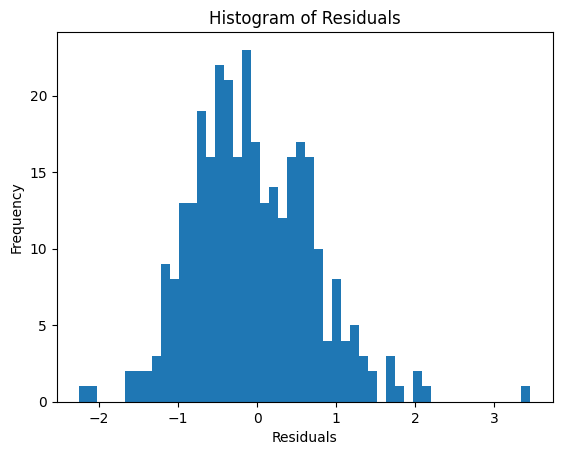

In [18]:
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()